# CONTEXTE

Mission - Segmentez des clients d'un site e-commerce


Comment allez vous procéder ?
Barres titres

 

Cette mission suit un scénario de projet professionnel.


Vous pouvez suivre les étapes pour vous aider à réaliser vos livrables.

 

Avant de démarrer, nous vous conseillons de :

lire toute la mission et ses documents liés ;
prendre des notes sur ce que vous avez compris ;
consulter les étapes pour vous guider ; 
préparer une liste de questions pour votre première session de mentorat.
 

Prêt à mener la mission ?
Barres titres

 

Vous êtes consultant pour Olist, une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

 

La page d'accueil du site Olist
Votre rôle est d’accompagner Olist dans leur projet de monter une équipe Data et leur premier cas d’usage Data Science autour de la segmentation client.

 

Vous venez de rejoindre Olist dans un contexte de recrutement intensif afin de monter leur équipe Data. En effet, ils font d’abord appel à des consultants comme vous en renfort sur les sujets les plus critiques en attendant d'internaliser les compétences. Avant de réaliser la segmentation client, on vous attribue une première mission pour aider Fernanda, Lead Data Analyst chez Olist. 

 

De : Fernanda

A : Moi

Objet : dashboard Customer Experience

Bonjour,

 

Bienvenue chez Olist ! Nous sommes ravis d’avoir du soutien en cette période de mise en place de notre écosystème Data.

 

A ce sujet d’ailleurs, l’un de nos projets Data phares du moment est la construction et la maintenance de notre Dashboard au service des équipes Customer Experience. Nous y exposons les KPIs essentiels pour que les équipes puissent avoir de la visibilité sur les états, les villes, ou les vendeurs qui nécessitent un suivi de près de la part de notre service client.

 

Nous sommes en train d’alimenter les résultats de ce Dashboard avec des requêtes qui interrogent la base de données SQL à laquelle tu as accès.

 

C’est sur l’implémentation de certaines requêtes urgentes que tu peux nous filer un coup de main le temps qu’un nouveau Data Analyst rejoigne l’équipe pour prendre le relais.

 

Je mets en PJ la liste de requêtes SQL que nous avons besoin d’intégrer au Dashboard. 

 

Cordialement,

Fernanda

Lead Data Analyst chez Olist

Pieces jointes:

Liste de requêtes SQL
Après avoir étudié les éléments partagés par Fernanda vous vous mettez au travail.

 

Quelques jours plus tard
Barres titres

 

Cette urgence résolue, vous pouvez enfin passer à votre mission principale : Olist souhaite que vous fournissiez à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

 

Votre objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

 

Vous devrez fournir à l’équipe Marketing une description actionable de votre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

 

Les données
Pour cette mission, Olist vous fournit une base de données anonymisée comportant des informations sur l’historique des commandes, les produits achetés, les commentaires de satisfaction, et la localisation des clients depuis janvier 2017.

 

Vous devez aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Vous utiliserez donc des méthodes non supervisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

 

Vous créez donc un notebook et démarrez votre travail d’analyse exploratoire.

 
3 jours plus tard
Barres titres

 

Après quelques premières analyses, vous vous rendez compte qu'Olist ne vous a pas fourni beaucoup de données ; vous enquêtez donc auprès de l'entreprise pour obtenir quelques informations complémentaires, et vérifier que vous avez bien compris la mission.

 

Voici sa réponse :


De : João

A : Moi

Objet : re : segmentation des clients

Bonjour, 

 

Nous sommes confiants sur le fait que les données à disposition suffiront pour réaliser un premier clustering. Cela a déjà été fait par d’autres prestataires par le passé, avec encore moins de données.

 

La segmentation proposée doit être exploitable et facile d’utilisation par notre équipe Marketing. Elle doit au minimum pouvoir différencier les bons et moins bons clients en termes de commandes et de satisfaction. Nous attendons bien sûr une segmentation sur l’ensemble des clients.

 

Dans un deuxième temps, une fois le modèle de segmentation choisi, nous souhaiterions que vous nous fassiez une recommandation de fréquence à laquelle la segmentation doit être mise à jour pour rester pertinente, afin de pouvoir effectuer un devis de contrat de maintenance.


Pour information, le code fourni doit respecter la convention PEP8, pour être utilisable par Olist.

 

À titre d'exemple, je joins à cet e-mail la segmentation RFM réalisée par votre prédécesseur il y a quelques années. Mais c’est uniquement à titre d’exemple, j'attends un travail plus approfondi de votre part dans le cadre de ce projet (i.e. RFM, satisfaction et autres possibilités).

 

Bien à vous,

João de l’équipe Marketing

Pièce-jointe :

Schéma RFM, comparant récence, fréquence et montant et classant les clients en groupes.


Vous réalisez trois autres documents afin de préparer une réponse à Olist : 

Un notebook avec des essais des différentes approches de modélisation 
Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation, afin que celui-ci reste pertinent 
Une présentation pour un collègue afin d’obtenir ses retours sur votre approche
 

C’est parti pour cette dernière ligne droite ! 

 

 

# LIVRABLES

* Un script avec l’ensemble des requêtes SQL demandées par Fernanda
* Un notebook de l'analyse exploratoire (non cleané, pour comprendre votre démarche)
* Un notebook (ou code commenté au choix) d’essais des différentes approches de modélisation (non cleané, pour comprendre votre démarche)
* Un notebook de simulation pour déterminer la fréquence nécessaire de mise à jour du modèle de segmentation
* Un support de présentation pour présenter votre travail à un collègue

# IMPORTS

In [2]:
# data & science
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
from sklearn.cluster import KMeans 
import category_encoders as ce
# graphiques
import matplotlib.pyplot as plt
import seaborn as sns
# system & tools
import sqlite3
from datetime import datetime, timedelta
from importlib import reload
import warnings
import locale
import time
# warnings.filterwarnings('ignore')
#import sys
#sys.path.insert(0, '/Users/stephanieduhem/Documents/MASTER_AI_ENGINEER/openclassroom/tools')
#import functions as fct


# FONCTIONS

In [3]:
##### FONCTION POUR GÉNÉRER UN DF RÉCAPITULATIF DES NAN DANS CHAQUE COLONNE
def taux_nan(dataframe) :
    # RÉCUPÉRER LE NOMBRE TOTAL DE DONNÉES
    total_data = dataframe.size
    # RÉCUPÉRER LE NOMBRE TOTAL DE VALEURS MANQUANTES
    total_nan = dataframe.isna().sum().sum()
    # CALCULER LE POURCENTAGE TOTAL DE VALEURS MANQUANTES
    taux_nan = (total_nan / total_data) * 100
    print(f'Le dataframe sélectionné contient {round(taux_nan, 2)} % de valeurs manquantes')
    

# SIMULATION POUR DÉTERMINER LA FREQUENCE DE MISE À JOUR DE LA SEGMENTATION CLIENT

### Pour rappel :

- Le clustering à retenir (le plus facilement interprétable et donnant les informations les plus pertinentes) est donc le **kmeans sur ['recence', 'frequence', 'montant', 'review_score_moyen', 'delais_moyen'] en 4 clusters**, qui permet d'identifier les 4 groupes suivants :
    * CLUSTER 0 (11169 clients): clienst perdus
    * CLUSTER 1 (23267 clients): nouveaux arrivants à relancer
    * CLUSTER 2 (2792 clients): clients fidèles, satisfaits et dépensiers
    * CLUSTER 3 (55526 clients): clients anciens à relancer
- ce clustering permets d'identifier notament l'impact du délai de livraison sur la fidélisation des clients, et d'identifier que les montants élevés des achats ne sont pas nécessairement un frein à celle-ci.

# MÉTHODOLOGIE
- considérant l'**historique des commandes dans l'ordre chronologique**, des plus anciennes au plus récentes, comme une série temporelle.
- considérant le **meilleur kmeans** déterminé précédemment tel que : ['recence', 'frequence', 'montant', 'review_score_moyen', 'delais_moyen'] en 4 clusters. 


- Nous allons étudier la dérive des clusters au fil du temps, en utilisant l'historique découpé comme suit :
    * une première période d'entraînement sur les 3 premiers mois d'historique 
    * des intervalles d'un mois rajoutés à cette période initiale jusqu'à la fin de l'historique 

- Nous penserons pour chaque période (l'initiale de 3 mois et les intervalles suivants) à recalculer les variables. 

- 1- nous allons initialisé un **kmeans de référence**, entrainé sur la 1ère période de 3 mois (1er calcul des variables), et nous allons le faire prédire les "futurs" labels sur les intervalles d'1 mois successives jusqu'à la fin de l'historique (2ème calcul des variables), sans faire de réentraînement.

- 2- nous allons initialisé un **kmeans réalité terrain** entrainé sur la première période (1er calcul des variables) et le comparer avec le kmeans de référence sur la même période. pour les intervalles de temps suivants, nous le retraînerons sur l'ensemble des données (période initiale + intervalles avec calcul des variables à chaque fois) et comparerons ces résultats avec les prédictions du kmeans de référence à chaque fois sur la même période.

- 3- la comparaison sera faite en utilisant le ARI Score sur les 2 partitions à chaque période.

- L'Adjusted Rand Index (ARI) est une mesure de similarité entre deux partitions d'un ensemble de données. Il est utilisé pour évaluer la qualité d'un clustering en comparant les clusters obtenus avec une segementation de référence. il permet donc d'évaluer la stabilité des clusters au fil du temps.
    - L'ARI varie de -1 à 1.
    - Un ARI de 1 indique que les deux partitions sont identiques.
    - Un ARI de 0 indique que la similarité entre les partitions est due au hasard.
    - Un ARI négatif indique que les partitions sont moins similaires que ce que l'on pourrait attendre par hasard.



# ETUDE DÉRIVE DES CLUSTERS

## Récupération des données pour le Kmeans réalité terrain

In [32]:
# Connexion à la base de données SQLite
conn = sqlite3.connect('./olist.db')
cursor = conn.cursor()

# Récupérer la date de la première commande - sur les commandes livrées
cursor.execute("SELECT MIN(order_purchase_timestamp) FROM orders WHERE orders.order_status = 'delivered';")
first_date = cursor.fetchone()[0]
start_date = datetime.strptime(first_date, '%Y-%m-%d %H:%M:%S')
print(f"Date de la 1ere commande sur tout l'historique : {start_date}")
    
# Récupérer la date de la dernière commande - sur les commandes livrées
cursor.execute("SELECT MAX(order_purchase_timestamp) FROM orders WHERE orders.order_status = 'delivered';")
last_order_date = cursor.fetchone()[0]
last_order_date = datetime.strptime(last_order_date, '%Y-%m-%d %H:%M:%S')
#last_order_date += timedelta(days=1)
print(f"Date de la dernière commande sur tout l'historique : {last_order_date}")

# # définir l'intervalle d'1 mois en jours 
# interval = 30

# stocker les données recalculée sur chaque période
dataframes_dict = {}

# # définir la fin de la 1ère période, fin d'année (un peu plus de 3 mois)
# current_end_date = datetime.strptime('2016-12-31 23:59:59', '%Y-%m-%d %H:%M:%S')

# liste des dates d'intervalles
list_end_date = [#'2016-12-31 23:59:59','2017-01-31 23:59:59', 
                 '2017-02-28 23:59:59','2017-03-31 23:59:59', '2017-04-30 23:59:59', '2017-05-31 23:59:59',
                 '2017-06-30 23:59:59','2017-07-31 23:59:59', '2017-08-31 23:59:59','2017-09-30 23:59:59', '2017-10-31 23:59:59', '2017-11-30 23:59:59',
                 '2017-12-31 23:59:59','2018-01-31 23:59:59', '2018-02-28 23:59:59','2018-03-31 23:59:59', '2018-04-30 23:59:59', '2018-05-31 23:59:59',
                 '2018-06-30 23:59:59','2018-07-31 23:59:59', '2018-08-31 23:59:59']

# # évolution mensuelle des variables
# while current_end_date <= (last_order_date+ timedelta(days=50)):
#     print("start_date", start_date)
#     print("end_date", current_end_date)
#     print('*******************current_end_date <= last_order_date)', current_end_date)
    
# Convertir les dates en format string pour SQLite
start_date_str = start_date.strftime('%Y-%m-%d %H:%M:%S')    
    
for end_date in list_end_date:    
    
    # end_date_str = end_date.strftime('%Y-%m-%d %H:%M:%S')
    # print('*******************end_date_strend_date_str = current_end_date.strftime=)', end_date_str)
    
    print(f"Start Date: {start_date_str}, End Date: {end_date}")
        
    # Exécuter les instructions SQL séparément
    cursor.execute("""
    WITH params AS (
        SELECT 
            ? AS start_date,
            ? AS end_date
    ),
    
    -- Calculer la dernière date de commande pour chaque client
    last_order_date AS (
    SELECT customers.customer_unique_id, MAX(orders.order_purchase_timestamp) AS derniere_date_commande
    FROM customers
    INNER JOIN orders ON customers.customer_id = orders.customer_id
    -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
    WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
    AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
    AND orders.order_status = 'delivered'
    GROUP BY customers.customer_unique_id
    ),
    -- Récupérer la date la plus récente dans l'ensemble de données
    recent_date AS (
        SELECT MAX(order_purchase_timestamp) AS recent_date
        FROM orders
        -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
        WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
        AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
        AND orders.order_status = 'delivered'
    ),
    -- Calculer la récence en jours pour chaque client et arrondir au jour entier
    recence_calculation AS (
        SELECT 
            l.customer_unique_id,
            ROUND(JULIANDAY(r.recent_date) - JULIANDAY(l.derniere_date_commande)) AS recence
        FROM 
            last_order_date l, 
            recent_date r
    ),
    -- Calculer le nombre de commandes pour chaque client
    frequence_calculation AS (
        SELECT customers.customer_unique_id, COUNT(DISTINCT orders.order_id) AS frequence
        FROM customers
        INNER JOIN orders ON customers.customer_id = orders.customer_id
        -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
        WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
        AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
        AND orders.order_status = 'delivered'
        GROUP BY customers.customer_unique_id        
    ),  
    -- Calculer le montant total pour chaque commande
    commande_totale AS (
        SELECT 
            orders.order_id,
            customers.customer_unique_id,
            SUM(order_items.price + order_items.freight_value) AS total_commande
        FROM customers
        INNER JOIN orders ON customers.customer_id = orders.customer_id
        INNER JOIN order_items ON orders.order_id = order_items.order_id
        -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
        WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
        AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
        AND orders.order_status = 'delivered'
        GROUP BY orders.order_id, customers.customer_unique_id          
    ),
    -- Calculer le montant total dépensé par chaque client
    montant_calculation AS (
        SELECT 
            customer_unique_id, 
            SUM(total_commande) AS montant
        FROM commande_totale
        GROUP BY customer_unique_id
    ),
    -- Calculer la moyenne des scores de review pour chaque client
    review_score_calculation AS (
        SELECT 
            customers.customer_unique_id, 
            AVG(order_reviews.review_score) AS review_score_moyen
        FROM customers
        INNER JOIN orders ON customers.customer_id = orders.customer_id
        INNER JOIN order_reviews ON orders.order_id = order_reviews.order_id
        -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
        WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
        AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
        AND orders.order_status = 'delivered'
        GROUP BY customers.customer_unique_id   
    ),  
    -- Calculer le délai moyen de livraison pour chaque client 
    delais_calculation AS (
        SELECT 
            customers.customer_unique_id, 
            AVG(JULIANDAY(orders.order_delivered_customer_date) - JULIANDAY(orders.order_purchase_timestamp)) AS delais_moyen
        FROM customers
        INNER JOIN orders ON customers.customer_id = orders.customer_id
        -- WHERE orders.order_purchase_timestamp BETWEEN (SELECT start_date FROM params) AND (SELECT end_date FROM params)
        WHERE orders.order_purchase_timestamp >= (SELECT start_date FROM params) 
        AND orders.order_purchase_timestamp <= (SELECT end_date FROM params)
        AND orders.order_status = 'delivered'
        GROUP BY customers.customer_unique_id
    )
    SELECT 
    r.customer_unique_id, 
    r.recence, 
    l.derniere_date_commande,
    f.frequence, 
    m.montant,
    v.review_score_moyen,
    d.delais_moyen
    
    FROM 
        recence_calculation r
    INNER JOIN 
        last_order_date l ON r.customer_unique_id = l.customer_unique_id
    INNER JOIN 
        frequence_calculation f ON r.customer_unique_id = f.customer_unique_id
    INNER JOIN 
        montant_calculation m ON r.customer_unique_id = m.customer_unique_id
    INNER JOIN 
        review_score_calculation v ON r.customer_unique_id = v.customer_unique_id
    INNER JOIN 
        delais_calculation d ON r.customer_unique_id = d.customer_unique_id;          
       
    """, (start_date_str, 
          end_date,))
    
    # Récupérer les résultats
    data = cursor.fetchall()
    
    # Convertir les résultats en DataFrame
    df = pd.DataFrame(data, columns=['customer_unique_id', 'recence', 'derniere_date_commande', 'frequence', 'montant', 'review_score_moyen', 'delais_moyen'])
    
    # Ajouter le DataFrame au dictionnaire
    dataframes_dict[end_date] = df
    
    # # Augmenter la end_date par un intervalle d'un mois
    # current_end_date += timedelta(days=interval)
    # print('*******************current_end_date += timedelta(days=interval)', current_end_date)
    
# Fermer la connexion à la base de données
conn.close()


Date de la 1ere commande sur tout l'historique : 2016-09-15 12:16:38
Date de la dernière commande sur tout l'historique : 2018-08-29 15:00:37
Start Date: 2016-09-15 12:16:38, End Date: 2017-02-28 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-03-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-04-30 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-05-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-06-30 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-07-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-08-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-09-30 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-10-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-11-30 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2017-12-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2018-01-31 23:59:59
Start Date: 2016-09-15 12:16:38, End Date: 2018-02-28 23:59:59
Start Date: 2016-09-15 12:16:38, End Da

In [33]:
dataframes_dict.keys()

dict_keys(['2017-02-28 23:59:59', '2017-03-31 23:59:59', '2017-04-30 23:59:59', '2017-05-31 23:59:59', '2017-06-30 23:59:59', '2017-07-31 23:59:59', '2017-08-31 23:59:59', '2017-09-30 23:59:59', '2017-10-31 23:59:59', '2017-11-30 23:59:59', '2017-12-31 23:59:59', '2018-01-31 23:59:59', '2018-02-28 23:59:59', '2018-03-31 23:59:59', '2018-04-30 23:59:59', '2018-05-31 23:59:59', '2018-06-30 23:59:59', '2018-07-31 23:59:59', '2018-08-31 23:59:59'])

In [34]:
dataframes_dict['2017-02-28 23:59:59'].sort_values('recence')

,customer_unique_id,recence,derniere_date_commande,frequence,montant,review_score_moyen,delais_moyen
1719,abdba04f4171f0055199d2c3c09c1dfc,0.0,2017-02-28 16:11:51,1,112.30,4.0,9.014248
220,141d57aadf94984e72de1bd1cc87c8ab,0.0,2017-02-28 20:57:21,1,37.72,4.0,2.422095
1699,a99c6337b519f25161bca8f0d397250e,0.0,2017-02-28 19:58:46,1,761.82,5.0,9.437002
2330,e63bca828db25447c5563f2f580c7dda,0.0,2017-02-28 17:39:47,1,63.70,5.0,12.560359
1483,95db44cac4c263525cfb83f5b65a4f15,0.0,2017-02-28 19:14:34,1,406.87,4.0,13.759248
...,...,...,...,...,...,...,...
1155,7390ed59fa1febbfda31a80b4318c8cb,148.0,2016-10-03 22:44:10,1,154.57,5.0,30.639352
182,10e89fd8e5c745f81bec101207ba4d7d,148.0,2016-10-03 22:51:30,1,92.27,1.0,28.682812
1363,88bc832f104b6dd684a17dbb1b76e778,148.0,2016-10-04 09:59:03,1,114.77,1.0,44.952824
523,32ea3bdedab835c3aa6cb68ce66565ef,149.0,2016-10-03 09:44:50,1,45.46,4.0,23.178738


In [35]:
dataframes_dict['2018-08-31 23:59:59'].sort_values('recence')

,customer_unique_id,recence,derniere_date_commande,frequence,montant,review_score_moyen,delais_moyen
12350,21dbe8eabd00b34492a939c540e2b1a7,0.0,2018-08-29 10:22:35,1,14.29,5.0,1.236620
1505,0421e7a23f21e5d54efed456aedbc513,0.0,2018-08-29 11:06:11,1,119.42,5.0,1.535220
13349,24ac2b4327e25baf39f2119e4228976a,0.0,2018-08-29 15:00:37,1,93.75,5.0,1.057627
66389,b701bebbdf478f5500348f03aff62121,0.0,2018-08-29 14:52:00,1,33.23,3.0,1.072905
63806,afbcfd0b9c5233e7ccc73428526fbb52,0.0,2018-08-29 08:46:11,1,497.25,5.0,1.547616
...,...,...,...,...,...,...,...
17250,2f64e403852e6893ae37485d5fcacdaf,695.0,2016-10-03 16:56:50,1,39.09,4.0,24.057500
49102,87776adb449c551e74c13fc34f036105,695.0,2016-10-03 22:31:31,1,40.95,5.0,10.733669
6186,10e89fd8e5c745f81bec101207ba4d7d,695.0,2016-10-03 22:51:30,1,92.27,1.0,28.682812
51073,8d3a54507421dbd2ce0a1d58046826e0,695.0,2016-10-03 22:06:03,1,133.46,1.0,27.542813


### Transformations requises des données

In [36]:
# appliquer les transformations nécessaires aux dataframes

transfo_df_dict = {}

for end_date, df in dataframes_dict.items():
    # delais_moyen : utilisation de la médiane de delais_moyen
    df['delais_moyen'] = df['delais_moyen'].fillna(df['delais_moyen'].median())
    # enlever les 0 dans la colonne récence
    df['recence'] = df.recence.apply(lambda x: 1 if x == 0 else x)
    # passer la récence au format int
    df['recence'] = df['recence'].astype(int)
    # vérif nan
    taux_nan(df)
    # ne pas utiliser les id en variable
    df = df.set_index('customer_unique_id')
    # transformation logarithmique
    for variable in df.select_dtypes(include=[np.number]).columns:
        df[f'log_{variable}'] = np.log1p(df[variable])  # utilisation de log1p pour éviter log(0)
    # tri des données par récence (du plus récent au plus ancien)
    df = df.sort_values(by='recence')
    
    transfo_df_dict[end_date] = df


Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataframe sélectionné contient 0.0 % de valeurs manquantes
Le dataf

In [37]:
transfo_df_dict['2017-02-28 23:59:59'].sort_values('recence')

,recence,derniere_date_commande,frequence,montant,review_score_moyen,delais_moyen,log_recence,log_frequence,log_montant,log_review_score_moyen,log_delais_moyen
customer_unique_id,,,,,,,,,,,
abdba04f4171f0055199d2c3c09c1dfc,1,2017-02-28 16:11:51,1,112.30,4.0,9.014248,0.693147,0.693147,4.730039,1.609438,2.304009
c553ed39d07bd5f153310dfdc0ba657f,1,2017-02-28 12:00:26,1,61.74,3.0,22.109398,0.693147,0.693147,4.138999,1.386294,3.140239
ffba9f9dff87b05e310ecc46c8591044,1,2017-02-27 15:39:41,1,1626.83,5.0,15.005660,0.693147,0.693147,7.395003,1.791759,2.772942
3b0610a6b6c37bf5e849e71914f238c6,1,2017-02-28 11:27:39,1,1246.34,1.0,6.264549,0.693147,0.693147,7.128769,0.693147,1.983006
103f55ed7f4926c31a68ad8fab284071,1,2017-02-28 10:15:13,1,40.74,5.0,14.970208,0.693147,0.693147,3.731460,1.791759,2.770725
...,...,...,...,...,...,...,...,...,...,...,...
10e89fd8e5c745f81bec101207ba4d7d,148,2016-10-03 22:51:30,1,92.27,1.0,28.682812,5.003946,0.693147,4.535499,0.693147,3.390568
9f302d00dd3e18ed3745778184b4f0fe,148,2016-10-04 10:16:04,1,237.45,5.0,35.017940,5.003946,0.693147,5.474160,1.791759,3.584017
88bc832f104b6dd684a17dbb1b76e778,148,2016-10-04 09:59:03,1,114.77,1.0,44.952824,5.003946,0.693147,4.751605,0.693147,3.827615


In [38]:
transfo_df_dict['2018-08-31 23:59:59'].info()
display(transfo_df_dict['2018-08-31 23:59:59'])

<class 'pandas.core.frame.DataFrame'>
Index: 92755 entries, bfd827e8a21c8be7bdef29573a885b76 to 830d5b7aaa3b6f1e9ad63703bec97d23
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   recence                 92755 non-null  int64  
 1   derniere_date_commande  92755 non-null  object 
 2   frequence               92755 non-null  int64  
 3   montant                 92755 non-null  float64
 4   review_score_moyen      92755 non-null  float64
 5   delais_moyen            92755 non-null  float64
 6   log_recence             92755 non-null  float64
 7   log_frequence           92755 non-null  float64
 8   log_montant             92755 non-null  float64
 9   log_review_score_moyen  92755 non-null  float64
 10  log_delais_moyen        92755 non-null  float64
dtypes: float64(8), int64(2), object(1)
memory usage: 8.5+ MB


,recence,derniere_date_commande,frequence,montant,review_score_moyen,delais_moyen,log_recence,log_frequence,log_montant,log_review_score_moyen,log_delais_moyen
customer_unique_id,,,,,,,,,,,
bfd827e8a21c8be7bdef29573a885b76,1,2018-08-28 14:01:04,1,126.63,5.0,2.502396,0.693147,0.693147,4.849135,1.791759,1.253447
7a22d14aa3c3599238509ddca4b93b01,1,2018-08-29 12:25:59,1,73.10,1.0,1.432269,0.693147,0.693147,4.305416,0.693147,0.888824
2cbb27285e259123d5b9aac321b7085e,1,2018-08-28 16:33:22,1,216.58,4.0,2.184259,0.693147,0.693147,5.382567,1.609438,1.158220
85433b79199eaa164656369cc4fe3e0a,1,2018-08-28 11:51:45,1,66.03,5.0,1.168762,0.693147,0.693147,4.205140,1.791759,0.774156
c68b545a924d24da9c0f35ab7e6aee94,1,2018-08-28 11:26:59,1,26.38,5.0,2.122130,0.693147,0.693147,3.309813,1.791759,1.138515
...,...,...,...,...,...,...,...,...,...,...,...
2f64e403852e6893ae37485d5fcacdaf,695,2016-10-03 16:56:50,1,39.09,4.0,24.057500,6.545350,0.693147,3.691127,1.609438,3.221173
87776adb449c551e74c13fc34f036105,695,2016-10-03 22:31:31,1,40.95,5.0,10.733669,6.545350,0.693147,3.736478,1.791759,2.462462
10e89fd8e5c745f81bec101207ba4d7d,695,2016-10-03 22:51:30,1,92.27,1.0,28.682812,6.545350,0.693147,4.535499,0.693147,3.390568


## Comparaison des 2 segmentations

### Clustering pour chaque période

In [39]:
# liste des dates d'intervalles
list_end_date = [#'2016-12-31 23:59:59','2017-01-31 23:59:59', 
                 '2017-02-28 23:59:59','2017-03-31 23:59:59', '2017-04-30 23:59:59', '2017-05-31 23:59:59',
                 '2017-06-30 23:59:59','2017-07-31 23:59:59', '2017-08-31 23:59:59','2017-09-30 23:59:59', '2017-10-31 23:59:59', '2017-11-30 23:59:59',
                 '2017-12-31 23:59:59','2018-01-31 23:59:59', '2018-02-28 23:59:59','2018-03-31 23:59:59', '2018-04-30 23:59:59', '2018-05-31 23:59:59',
                 '2018-06-30 23:59:59','2018-07-31 23:59:59', '2018-08-31 23:59:59']
# dictionnaire pour clustering rélité terrain
real_labels_df_dict = {}
# dictionnaire pour clustering de réfrénece
ref_labels_df_dict = {}
# normalisation
scaler = StandardScaler()

for end_date in list_end_date :
    df_end_date = transfo_df_dict[end_date]
    print(f"Date de fin: {end_date}, nbre de lignes transfo_realité_terrain : {len(df_end_date)}")
    # Sélection des variables 
    df_end_date_log = df_end_date.filter(['log_recence', 'log_frequence', 'log_montant', 'log_review_score_moyen', 'log_delais_moyen'])
    # Normalisation des données
    df_end_date_log_scaled = scaler.fit_transform(df_end_date_log)
    # KMEANS réalité terrain fit_predict sur la période, utilisation des variables en log et normalisées
    kmeans_real_terrain = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
    real_labels = kmeans_real_terrain.fit_predict(df_end_date_log_scaled)
    # récupération des labels du train
    real_labels_df = df_end_date.copy(deep=True)
    real_labels_df['real_labels'] = real_labels
    # enregistrer les partitions dans le dict
    real_labels_df_dict[end_date] = real_labels_df
    
        
    if end_date != '2017-02-28 23:59:59':
        df_end_date = transfo_df_dict[end_date]
        print(f"Date de fin: {end_date}, nbre de lignes df_end_date : {len(df_end_date)}")
        # partition des données de train / predict
        df_end_date_log_train = df_end_date[df_end_date['derniere_date_commande']<= '2017-02-28 23:59:59'].filter(['log_recence', 'log_frequence', 'log_montant', 'log_review_score_moyen', 'log_delais_moyen'])
        df_end_date_log_pred = df_end_date[df_end_date['derniere_date_commande']> '2017-02-28 23:59:59'].filter(['log_recence', 'log_frequence', 'log_montant', 'log_review_score_moyen', 'log_delais_moyen'])
        # Normalisation des données
        df_end_date_log_train_scaled = scaler.fit_transform(df_end_date_log_train)
        df_end_date_log_pred_scaled = scaler.transform(df_end_date_log_pred)
        # train
        kmeans_REF = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
        ref_labels_train = kmeans_REF.fit_predict(df_end_date_log_train_scaled)
        # récupération des labels du train
        ref_labels_train_df = df_end_date_log_train.copy(deep=True)
        ref_labels_train_df['ref_labels'] = ref_labels_train
        # prédictions
        ref_labels_pred = kmeans_REF.predict(df_end_date_log_pred_scaled)
        # récupération des labels du test
        ref_labels_pred_df = df_end_date_log_pred.copy(deep=True)
        ref_labels_pred_df['ref_labels'] = ref_labels_pred
         # regrouper les données 
        data_ref_labels = pd.concat([ref_labels_pred_df, ref_labels_train_df], ignore_index=False)
        # vérification de l'absence de doublon
        doublons = data_ref_labels.duplicated()
        print(f"il y a {doublons.sum()} doublon(s)")
        # enregistrer les partitions dans le dict
        ref_labels_df_dict[end_date] = data_ref_labels
    else:
        df_end_date = transfo_df_dict[end_date]
        print(f"Date de fin: {end_date}, nbre de lignes df_end_date : {len(df_end_date)}")
        # Sélection des variables 
        df_end_date_log = df_end_date.filter(['log_recence', 'log_frequence', 'log_montant', 'log_review_score_moyen', 'log_delais_moyen'])
        # Normalisation des données
        df_end_date_log_train_scaled = scaler.fit_transform(df_end_date_log)
        # train
        kmeans_REF = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=42)
        ref_labels = kmeans_REF.fit_predict(df_end_date_log_train_scaled)
        # récupération des labels du train
        ref_labels_df = df_end_date.copy(deep=True)
        ref_labels_df['ref_labels'] = ref_labels
        # enregistrer les partitions dans le dict
        ref_labels_df_dict[end_date] = ref_labels_df
        
 
     

Date de fin: 2017-02-28 23:59:59, nbre de lignes transfo_realité_terrain : 2587
Date de fin: 2017-02-28 23:59:59, nbre de lignes df_end_date : 2587
Date de fin: 2017-03-31 23:59:59, nbre de lignes transfo_realité_terrain : 5071
Date de fin: 2017-03-31 23:59:59, nbre de lignes df_end_date : 5071
il y a 0 doublon(s)
Date de fin: 2017-04-30 23:59:59, nbre de lignes transfo_realité_terrain : 7314
Date de fin: 2017-04-30 23:59:59, nbre de lignes df_end_date : 7314
il y a 0 doublon(s)
Date de fin: 2017-05-31 23:59:59, nbre de lignes transfo_realité_terrain : 10739
Date de fin: 2017-05-31 23:59:59, nbre de lignes df_end_date : 10739
il y a 0 doublon(s)
Date de fin: 2017-06-30 23:59:59, nbre de lignes transfo_realité_terrain : 13752
Date de fin: 2017-06-30 23:59:59, nbre de lignes df_end_date : 13752
il y a 0 doublon(s)
Date de fin: 2017-07-31 23:59:59, nbre de lignes transfo_realité_terrain : 17474
Date de fin: 2017-07-31 23:59:59, nbre de lignes df_end_date : 17474
il y a 0 doublon(s)
Date d

In [40]:
ref_labels_df_dict.keys()

dict_keys(['2017-02-28 23:59:59', '2017-03-31 23:59:59', '2017-04-30 23:59:59', '2017-05-31 23:59:59', '2017-06-30 23:59:59', '2017-07-31 23:59:59', '2017-08-31 23:59:59', '2017-09-30 23:59:59', '2017-10-31 23:59:59', '2017-11-30 23:59:59', '2017-12-31 23:59:59', '2018-01-31 23:59:59', '2018-02-28 23:59:59', '2018-03-31 23:59:59', '2018-04-30 23:59:59', '2018-05-31 23:59:59', '2018-06-30 23:59:59', '2018-07-31 23:59:59', '2018-08-31 23:59:59'])

In [41]:
len(ref_labels_df_dict['2017-02-28 23:59:59']['ref_labels'].values)

2587

In [42]:
len(real_labels_df_dict['2017-02-28 23:59:59']['real_labels'].values)

2587

### Calcul du ARI Score sur les 2 partitions

In [43]:
# results ari_score à chaque période
ari_score_df = pd.DataFrame(columns=['end_dates', 'ari_scores']) 
# comparaison des partitions pour chaque période avec ARI Score
for end_date in list_end_date :    
    print(f"Date de fin: {end_date}")
    # récupérer les labels de ref
    ref_labels = ref_labels_df_dict[end_date]['ref_labels'].values
    print("len(ref_labels)", len(ref_labels))
    # récupérer les nouveaux labels
    real_labels = real_labels_df_dict[end_date]['real_labels'].values
    print("len(new_labels)", len(real_labels))
    # calculer le ari_score pour la période
    ari_score = adjusted_rand_score(ref_labels, real_labels)
    # mettre à jour le df de résultats
    new_row = pd.DataFrame({'end_dates': [end_date], 'ari_scores': [ari_score]})
    ari_score_df = pd.concat([ari_score_df, new_row], ignore_index=True)
    ari_score_df['end_dates'] = pd.to_datetime(ari_score_df['end_dates'])
    ari_score_df['mois_annee'] = ari_score_df['end_dates'].dt.strftime('%m-%Y')
    
display(ari_score_df)

Date de fin: 2017-02-28 23:59:59
len(ref_labels) 2587
len(new_labels) 2587
Date de fin: 2017-03-31 23:59:59
len(ref_labels) 5071
len(new_labels) 5071
Date de fin: 2017-04-30 23:59:59
len(ref_labels) 7314
len(new_labels) 7314
Date de fin: 2017-05-31 23:59:59
len(ref_labels) 10739
len(new_labels) 10739
Date de fin: 2017-06-30 23:59:59
len(ref_labels) 13752
len(new_labels) 13752
Date de fin: 2017-07-31 23:59:59
len(ref_labels) 17474
len(new_labels) 17474
Date de fin: 2017-08-31 23:59:59
len(ref_labels) 21505
len(new_labels) 21505
Date de fin: 2017-09-30 23:59:59
len(ref_labels) 25481
len(new_labels) 25481
Date de fin: 2017-10-31 23:59:59
len(ref_labels) 29778
len(new_labels) 29778
Date de fin: 2017-11-30 23:59:59
len(ref_labels) 36790
len(new_labels) 36790
Date de fin: 2017-12-31 23:59:59
len(ref_labels) 42080
len(new_labels) 42080
Date de fin: 2018-01-31 23:59:59
len(ref_labels) 48871
len(new_labels) 48871
Date de fin: 2018-02-28 23:59:59
len(ref_labels) 55118
len(new_labels) 55118
Date 

/var/folders/nf/_fsdpljs7vg7_n1ql08pmsyr0000gn/T/ipykernel_38382/1001474576.py:16: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  ari_score_df = pd.concat([ari_score_df, new_row], ignore_index=True)


Date de fin: 2018-06-30 23:59:59
len(ref_labels) 80718
len(new_labels) 80718
Date de fin: 2018-07-31 23:59:59
len(ref_labels) 86631
len(new_labels) 86631
Date de fin: 2018-08-31 23:59:59
len(ref_labels) 92755
len(new_labels) 92755


,end_dates,ari_scores,mois_annee
0,2017-02-28 23:59:59,1.000000,02-2017
1,2017-03-31 23:59:59,0.300498,03-2017
2,2017-04-30 23:59:59,0.391022,04-2017
3,2017-05-31 23:59:59,0.365930,05-2017
4,2017-06-30 23:59:59,0.223165,06-2017
5,2017-07-31 23:59:59,0.396355,07-2017
6,2017-08-31 23:59:59,0.364295,08-2017
7,2017-09-30 23:59:59,0.156359,09-2017
8,2017-10-31 23:59:59,0.415622,10-2017
9,2017-11-30 23:59:59,0.488350,11-2017


## Graphique évolution du ARI Score


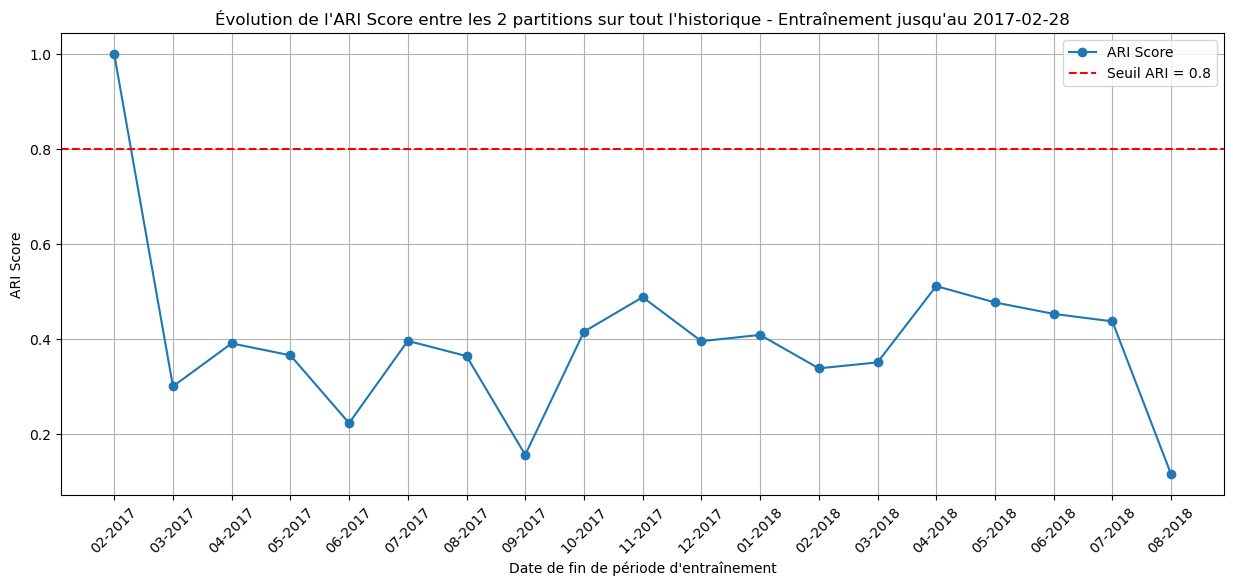

In [44]:
# Seuil d'ARI score
ari_threshold = 0.8
# Visualisation de l'évolution de l'ARI
plt.figure(figsize=(15, 6))
plt.plot(ari_score_df.mois_annee, ari_score_df.ari_scores, marker='o', label='ARI Score')
plt.axhline(y=ari_threshold, color='r', linestyle='--', label='Seuil ARI = 0.8')
plt.xlabel("Date de fin de période d'entraînement")
plt.ylabel('ARI Score')
plt.title("Évolution de l'ARI Score entre les 2 partitions sur tout l'historique - Entraînement jusqu'au 2017-02-28")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# CONCLUSION

- Suite à notre simulation, il semble qu'il faudrait mettre en place une maintenance tous les mois 
- Pour affiner notre estimation nous pourrions simuler les effets d'une maintenance régulière sur l'historique
- Certaines variables peuvent faire évoluer le nombre de cluster (par exemple la fréquence qui augmenterait drastiquement), il serait opportun de mettre en place des tests statistiques pour les évaluer et ainsi mettre en place des règles pour permettre une maintenance préventive
